In [ ]:
import tensorflow as tf
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout, Conv2D, MaxPool2D,\
                                    Dropout, UpSampling2D
from tensorflow.keras.models import Model, Sequential

## Data Imports + Labels

In [ ]:
# Dataset Imports

(mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y) = tf.keras.datasets.mnist.load_data()
(fmnist_train_x, fmnist_train_y), (fmnist_test_x, fmnist_test_y) = tf.keras.datasets.fashion_mnist.load_data()
(c10_train_x, c10_train_y), (c10_test_x, c10_test_y) = tf.keras.datasets.cifar10.load_data()
#(c100_train_x, c100_train_y), (c100_test_x, c100_test_y) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')   # Set to coarse for superset labels, set to fine for individual class labels

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# Import cifar100 labels
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

c100_data = unpickle('/content/drive/Shareddrives/COS429/Data/cifar-100-python/meta')

FileNotFoundError: ignored

In [ ]:
mnist_labels = {x: str(x) for x in range(10)}

fmnist_labels = {0:	'T-shirt/top',
          1:	'Trouser',
          2:	'Pullover',
          3: 'Dress',
          4:	'Coat',
          5:	'Sandal',
          6:	'Shirt',
          7:	'Sneaker',
          8:	'Bag',
          9:	'Ankle boot'
}

c10_labels = {0:	'airplane',
          1:	'automobile',
          2:	'bird',
          3: 'cat',
          4:	'deer',
          5:	'dog',
          6:	'frog',
          7:	'horse',
          8:	'ship',
          9:	'truck'
}

#c100_class_names = c100_data['coarse_label_names']
#c100_labels = {x: c100_class_names[x] for x in range(len(c100_class_names))}

## Shannon Entropy

In [ ]:
def calculate_class_entropies(x, y, class_labels):
  """ Given images (x) and labels (y), calculate shannon entropies for each class.
  Returns class_entropies, a DataFrame of classes and their entropies.
  """

  class_entropies = pd.DataFrame.from_dict(class_labels, orient='index')
  class_entropies = class_entropies.rename(columns={0: "class"})

  entropies = []
  for idx, class_labels in class_labels.items():
    images = x[np.where(y==idx)[0]]
    entropy = np.mean([shannon_entropy(img) for img in images])
    entropies.append(entropy)

  class_entropies['entropy'] = entropies
  return class_entropies

In [ ]:
cifar10_df = calculate_class_entropies(c10_train_x, c10_train_y, c10_labels)

In [ ]:
cifar10_df

,class,entropy
0,airplane,6.951922
1,automobile,7.416285
2,bird,7.032294
3,cat,7.303639
4,deer,7.180072
5,dog,7.373052
6,frog,7.208124
7,horse,7.383970
8,ship,7.305026
9,truck,7.474424


In [ ]:
np.mean(cifar10_df['entropy'])

7.262880763634425

In [ ]:
mnist_df = calculate_class_entropies(mnist_train_x, mnist_train_y, mnist_labels)

In [ ]:
mnist_df

,class,entropy
0,0,1.919965
1,1,0.946898
2,2,1.764053
3,3,1.742457
4,4,1.546640
5,5,1.665122
6,6,1.679158
7,7,1.423187
8,8,1.864537
9,9,1.576430


In [ ]:
np.mean(mnist_df['entropy'])

1.6128445869142098

In [ ]:
mnist_df.to_latex(index=False, float_format="%.2f", caption="Shannon entropy of MNIST sub-classes", label="MNIST_entropy")

'\\begin{table}\n\\centering\n\\caption{Shannon entropy of MNIST sub-classes}\n\\label{MNIST_entropy}\n\\begin{tabular}{lr}\n\\toprule\nclass &  entropy \\\\\n\\midrule\n    0 &     1.92 \\\\\n    1 &     0.95 \\\\\n    2 &     1.76 \\\\\n    3 &     1.74 \\\\\n    4 &     1.55 \\\\\n    5 &     1.67 \\\\\n    6 &     1.68 \\\\\n    7 &     1.42 \\\\\n    8 &     1.86 \\\\\n    9 &     1.58 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [ ]:
fmnist_df = calculate_class_entropies(fmnist_train_x, fmnist_train_y, fmnist_labels)

In [ ]:
np.mean(fmnist_df['entropy'])

4.116457171760574

In [ ]:
fmnist_df.to_latex(index=False, float_format="%.2f", caption="Shannon entropy of FMNIST sub-classes", label="FMNIST_entropy")

'\\begin{table}\n\\centering\n\\caption{Shannon entropy of FMNIST sub-classes}\n\\label{FMNIST_entropy}\n\\begin{tabular}{lr}\n\\toprule\n       class &  entropy \\\\\n\\midrule\n T-shirt/top &     4.59 \\\\\n     Trouser &     3.15 \\\\\n    Pullover &     5.00 \\\\\n       Dress &     3.63 \\\\\n        Coat &     4.87 \\\\\n      Sandal &     2.94 \\\\\n       Shirt &     4.89 \\\\\n     Sneaker &     3.15 \\\\\n         Bag &     4.76 \\\\\n  Ankle boot &     4.19 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [ ]:
fmnist_df.sort_values(by=['entropy'])

NameError: ignored

In [ ]:
c100_df = calculate_class_entropies(c100_train_x, c100_train_y, c100_labels)

In [ ]:
c100_df.sort_values(by=['entropy'])

,class,entropy
5,household_electrical_devices,6.888255
3,food_containers,6.918896
13,non-insect_invertebrates,6.926382
15,reptiles,7.014851
6,household_furniture,7.020737
7,insects,7.039596
19,vehicles_2,7.079283
1,fish,7.092887
4,fruit_and_vegetables,7.153018
0,aquatic_mammals,7.199116


## Autoencoder

In [ ]:
def train_autoencoder(x_train, x_test, noise = 0.3, epochs = 40, dataset='mnist'):
  """ Function to train autoencoder on input data x_train and x_test """

  # Reshape input data
  if dataset == 'mnist':
    train = x_train.reshape([-1,28,28,1]) / 255
    test = x_test.reshape([-1,28,28,1]) / 255 
    size = 28
    channels = 1
  else:
    train = x_train / 255
    test = x_test / 255 
    size = 32
    channels = 3

  # Adding noise to data
  train_noise = train + noise * np.random.normal(0, 1, size=train.shape)
  test_noise = test + noise * np.random.normal(0, 1, size=test.shape)

  train_noise = np.clip(train_noise, 0, 1)
  test_noise = np.clip(test_noise, 0, 1)

  # Encoder 
  inputs = Input(shape=(size,size,channels))

  x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
  x = MaxPool2D()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(32, 3, activation='relu', padding='same')(x)
  encoded = MaxPool2D()(x)

  # Decoder

  x = Conv2D(32, 3, activation='relu', padding='same')(encoded)
  x = UpSampling2D()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(32, 3, activation='relu', padding='same')(x)
  x = UpSampling2D()(x)
  decoded = Conv2D(channels, 3, activation='sigmoid', padding='same')(x)

  autoencoder = Model(inputs, decoded)
  autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
  print(autoencoder.summary())

  epochs = epochs
  batch_size = 256

  print(train_noise.shape, train.shape)
  history = autoencoder.fit(train_noise,
                  train,
                  epochs=epochs,
                  batch_size=batch_size,
                  shuffle=True,
                  validation_data=(test_noise, test))
                # )
  
  return autoencoder, history, test_noise

In [ ]:
mnist_ae, mnist_hist, mnist_test_noise = train_autoencoder(mnist_train_x, mnist_test_x, epochs=30)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                         

In [ ]:
c10_ae, c10_hist, c10_test_noise = train_autoencoder(c10_train_x, c10_test_x, epochs=30, dataset='cifar10')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                       

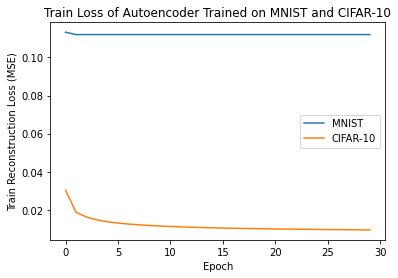

In [ ]:
fig, ax = plt.subplots()
ax.plot(mnist_hist.history['loss'], label='MNIST')
ax.plot(c10_hist.history['loss'], label='CIFAR-10')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Reconstruction Loss (MSE)')
ax.set_title('Train Loss of Autoencoder Trained on MNIST and CIFAR-10')
ax.legend(loc='best')

In [ ]:
def mse(x1, x2):
  return np.mean((x1 - x2)**2)

In [ ]:
mnist_test_pred = np.squeeze(mnist_ae.predict(mnist_test_noise))
np.mean([mse(mnist_test_pred[i], mnist_test_x[i]) for i in range(len(mnist_test_x))])

7353.041

In [ ]:
c10_test_pred = np.squeeze(c10_ae.predict(c10_test_noise))
np.mean([mse(c10_test_pred[i], c10_test_x[i]) for i in range(len(c10_test_x))])

18739.668

In [ ]:
mnist_test_mse = tf.keras.metrics.mean_squared_error(mnist_test_x, mnist_test_pred)
np.mean(np.mean(mnist_test_mse, axis=1))

7353.041

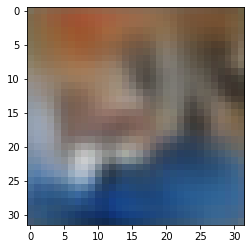

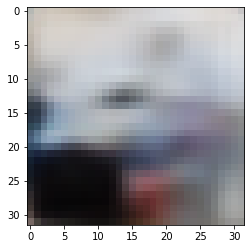

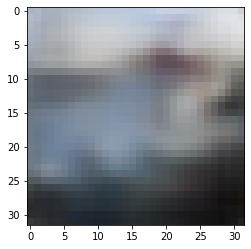

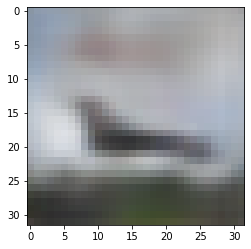

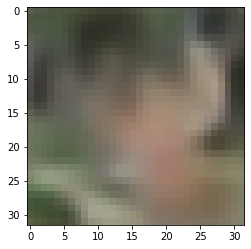

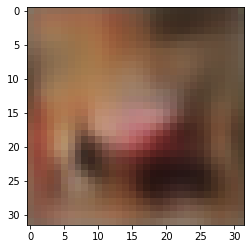

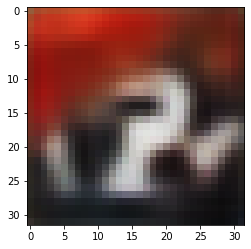

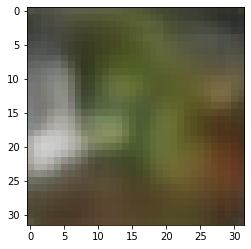

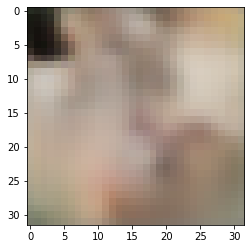

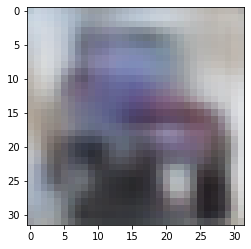

In [ ]:
for i in range(10):
  plt.imshow(c10_test_pred[i])
  plt.show()

## USPS Entropy

In [ ]:
import torchvision
import torch
usps_transform = torchvision.transforms.Compose( [torchvision.transforms.Resize((28,28)),
   torchvision.transforms.ToTensor(), torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

usps_dset_train = torchvision.datasets.USPS('./usps_pytorch', train=True, transform=usps_transform, target_transform=None, download=True)
usps_train_loader = torch.utils.data.DataLoader(usps_dset_train, batch_size=12, shuffle=True, num_workers=1)

  0%|          | 0/6579383 [00:00<?, ?it/s]

In [ ]:
from skimage.measure import shannon_entropy

counts = {i: 0 for i in range(10)}
entropies = {i: 0 for i in range(10)}

for data, target in usps_train_loader:

  for j, img in enumerate(data):
    i = target[j].item()
    counts[i] += 1
    entropies[i] += shannon_entropy(np.squeeze(img))

for i in range(10):
  entropies[i] /= counts[i]

In [ ]:
usps_df = pd.DataFrame.from_dict(entropies, orient='index')
usps_df = usps_df.rename(columns={0: "entropy"})
usps_df.reset_index(inplace=True)
usps_df = usps_df.rename(columns = {'index':'class'})

In [ ]:
np.mean(usps_df['entropy'])

5.938801535044803

In [ ]:
usps_df.to_latex(index=False, float_format="%.2f", caption="Shannon entropy of USPS sub-classes", label="USPS_entropy")

'\\begin{table}\n\\centering\n\\caption{Shannon entropy of USPS sub-classes}\n\\label{USPS_entropy}\n\\begin{tabular}{rr}\n\\toprule\n class &  entropy \\\\\n\\midrule\n     0 &     6.86 \\\\\n     1 &     4.07 \\\\\n     2 &     6.43 \\\\\n     3 &     6.51 \\\\\n     4 &     5.82 \\\\\n     5 &     6.54 \\\\\n     6 &     5.97 \\\\\n     7 &     5.40 \\\\\n     8 &     6.18 \\\\\n     9 &     5.61 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'